# Small Demo on how to controllably create a graph with G-PCGRL

* We load a pretrained model to create a graph of 6 nodes using the set of constraints 1 from the paper.

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

from stable_baselines3.ppo import PPO
from stable_baselines3.ppo.policies import MlpPolicy

from graph_helper import build_graph_map, init_graph_random
from gym_pcgrl.envs.probs.graph_prob import NodeType
from gym_pcgrl.wrappers_graph import GraphWrapper

warnings.filterwarnings('ignore')

In [2]:
# define rule set (this is Set 1, see paper for details)
rules = {
    NodeType.LOOT: [NodeType.CRAFT],
    NodeType.CRAFT: [NodeType.LOOT, NodeType.ITEM],
    NodeType.ITEM: [NodeType.CRAFT]
}

In [3]:
# define configuration to control model
conf = {
    NodeType.LOOT: 3,
    NodeType.CRAFT: 2,
    NodeType.ITEM: 1
}

def init_graph(random, width, height, prob, *args, **kwargs):
    return build_graph_map(conf, random, width)

In [4]:
representation = "widegraph"
size = 6
env_config = {
    "width": size,
    "height": size,
    "node_types": 6,
    "init_random_map": init_graph, # to use random configs use the init_graph_random function 
    "render_mode": "rgb_array"
}

env_name = '{}-{}-v0'.format("graph", representation)

env = GraphWrapper(env_name, **env_config)
obs, info = env.reset()

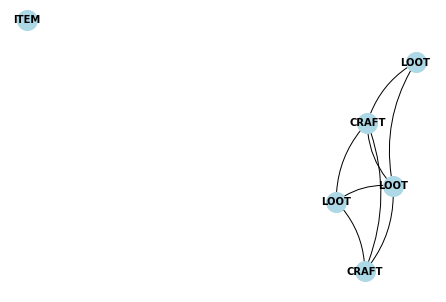

Is graph valid? False


In [5]:
# render current graph (random)
env.unwrapped.render(mode="graph")

print("Is graph valid?", info["valid"])

In [6]:
# load pretrained PPO model controllable up to 6 nodes with Set 1
model = PPO(MlpPolicy, env, n_steps=128).load("models/widegraph-size6-rules4-types3.zip", env)

In [7]:
def inference(env, model_):
    obs, _ = env.reset()
    done = False
    reward_total = 0
    for i in range(200):
        if not done:
            action, _ = model_.predict(obs)
            obs, reward, done, trunc, info = env.step(action)
            reward_total += reward
            if done:
                break
    return env, info, reward_total

In [8]:
env, info, reward = inference(env, model)
print("Is graph valid?", info["valid"], "Reward:", reward)

Is graph valid? True Reward: 22


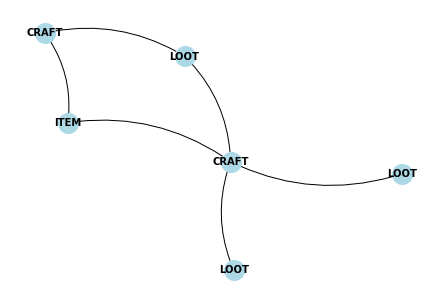

In [9]:
env.unwrapped.render(mode="graph")